# Ejemplo 01:

**Dr. Antonio Arista Jalife**

En este ejemplo vamos a construir manualmente un árbol de decisión para simular un juego de Adivina quién. Lo primero que haremos será importar las librerías que vamos a llegar a necesitar:

In [ ]:
import numpy as np

El siguiente paso es tomar todos los nombres de las personas, y asignarle a cada uno sus características. Digamos, para los nombres del adivina quien:

In [ ]:
#Para las salidas, utilizaremos la variable "Y"
y = ["Antonio", "Elly", "Patricia", "Maria", "Juana", "José", "Luis"]

Y para cada nombre, le vamos a poner características a cada uno en una tabla (matriz): 1 = Tiene esa característica 0 = No tiene esa característica

Cada columna es una característica:

Cabello largo | Usa lentes | Usa sombrero | Es mujer | Tiene bigote | Tiene ojos claros

In [ ]:
#Caracteristicas
#Cabello largo | Usa lentes | Usa sombrero | Es mujer | Tiene bigote | Tiene ojos claros
x = np.array([
     [0,1,0,0,0,0], #Antonio: No tiene cabello largo, usa lentes, no usa sombrero, no es mujer, no tiene bigote, no tiene ojos claros
     [1,1,1,1,0,0], #Elly: Tiene cabello largo, usa lentes, usa sombrero, es mujer, no tiene bigote, no tiene ojos claros
     [0,0,1,1,0,1], #Patricia: ...
     [1,1,0,1,0,0], #Maria: ...
     [0,0,1,1,0,0], #Juana: ...
     [1,0,0,0,1,1], #José: ...
     [0,1,1,0,0,1]  #Luis: ...
    ], dtype=np.int16)

Lo siguiente será crear las preguntas adecuadas para saber quien es la persona que queremos hallar:

In [ ]:
#Adivina quien es un array de True: Todos son sospechosos
adivinaquien = [True]*len(y)
print(adivinaquien)

[True, True, True, True, True, True, True]


Para cada pregunta, vamos a ver quienes son los sospechosos que quedan:

In [ ]:
print("Sospechosos que quedan: ")
for contador in range(len(adivinaquien)):
  if(adivinaquien[contador] == True):
    print(y[contador])

Sospechosos que quedan: 
Antonio
Elly
Patricia
Maria
Juana
José
Luis


In [ ]:
tieneCabelloLargo = 1 #Tiene cabello largo?

#primer pregunta: Tiene el cabello largo? solamente marca con "True" los que tengan cabello largo
pregunta1 = np.where(x[:,0] == tieneCabelloLargo, True, False)
adivinaquien = pregunta1
print(adivinaquien)

[False  True False  True False  True False]


In [ ]:
print("Sospechosos que quedan:")
for contador in range(len(adivinaquien)):
  if(adivinaquien[contador] == True):
    print(y[contador])

Sospechosos que quedan:
Elly
Maria
José


In [ ]:
usaLentes = 1 #Usa Lentes?

#Segunda pregunta, de los que quedan, quién usa lentes?
pregunta2 = np.where(x[:,1] == usaLentes, True, False)

#Tenemos que ver que los que usan lentes queden en la lista de sospechosos
for contador in range(len(adivinaquien)):
  adivinaquien[contador] = pregunta2[contador] and adivinaquien[contador]
print(adivinaquien)

[False  True False  True False False False]


In [ ]:
print("Sospechosos que quedan:")
for contador in range(len(adivinaquien)):
  if(adivinaquien[contador] == True):
    print(y[contador])

Sospechosos que quedan:
Elly
Maria


In [ ]:
usaSombrero = 1 #UsaSombrero

#Tercera pregunta, de los que quedan, quién usa sombrero?
pregunta3 = np.where(x[:,2] == usaSombrero, True, False)

#Tenemos que ver que los que usan sombrero queden en la lista de sospechosos
for contador in range(len(adivinaquien)):
  adivinaquien[contador] = pregunta3[contador] and adivinaquien[contador]
print(adivinaquien)

[False  True False False False False False]


In [ ]:
print("Sospechosos que quedan:")
for contador in range(len(adivinaquien)):
  if(adivinaquien[contador] == True):
    print(y[contador])

Sospechosos que quedan:
Elly


# Ejemplo 02

**Dr. Antonio Arista Jalife**

En este ejemplo vamos a jugar adivina quien, sin embargo ahora el algoritmo de Machine Learning generará las preguntas adecuadas, y nosotros veremos que tal funciona.

Lo primero que necesitaremos será importar algunas librerías extra.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import tree

Vamos a continuar manejando como variable Y (salida esperada) los nombres, y como variable X las características de cada persona, igual que en el ejemplo 01:

In [ ]:
#Para las salidas, utilizaremos la variable Y
y1 = ["Antonio", "Elly", "Patricia", "Maria", "Juana", "Jose", "Luis"]

#Caracteristicas
#Cabello largo | Usa lentes | Usa sombrero | Es mujer | Tiene bigote | Tiene ojos claros
x1 = np.array([
     [0,1,0,0,0,0], #Antonio: No tiene cabello largo, usa lentes, no usa sombrero, no es mujer, no tiene bigote, no tiene ojos claros
     [1,1,1,1,0,0], #Elly: Tiene cabello largo, usa lentes, usa sombrero, es mujer, no tiene bigote, no tiene ojos claros
     [0,0,1,1,0,1], #Patricia: ...
     [1,1,0,1,0,0], #Maria: ...
     [0,0,1,1,0,0], #Juana: ...
     [1,0,0,0,1,1], #José: ...
     [0,1,1,0,0,1]  #Luis: ...
    ], dtype=np.int16)

Ahora, vamos a crear un clasificador de tipo DecisionTreeClassifier: Un único árbol de decisión. Le alimentaremos los datos: X para las características, y Y para las características que mas se le parecen.

In [ ]:
arbol = tree.DecisionTreeClassifier()
arbol = arbol.fit(x1, y1)

Podemos emplear la función "plot_tree" para mostrar el arbol de forma esquemática. Si no puedes ver el árbol, intenta actualizando el paquete de scikit-learn (sklearn).

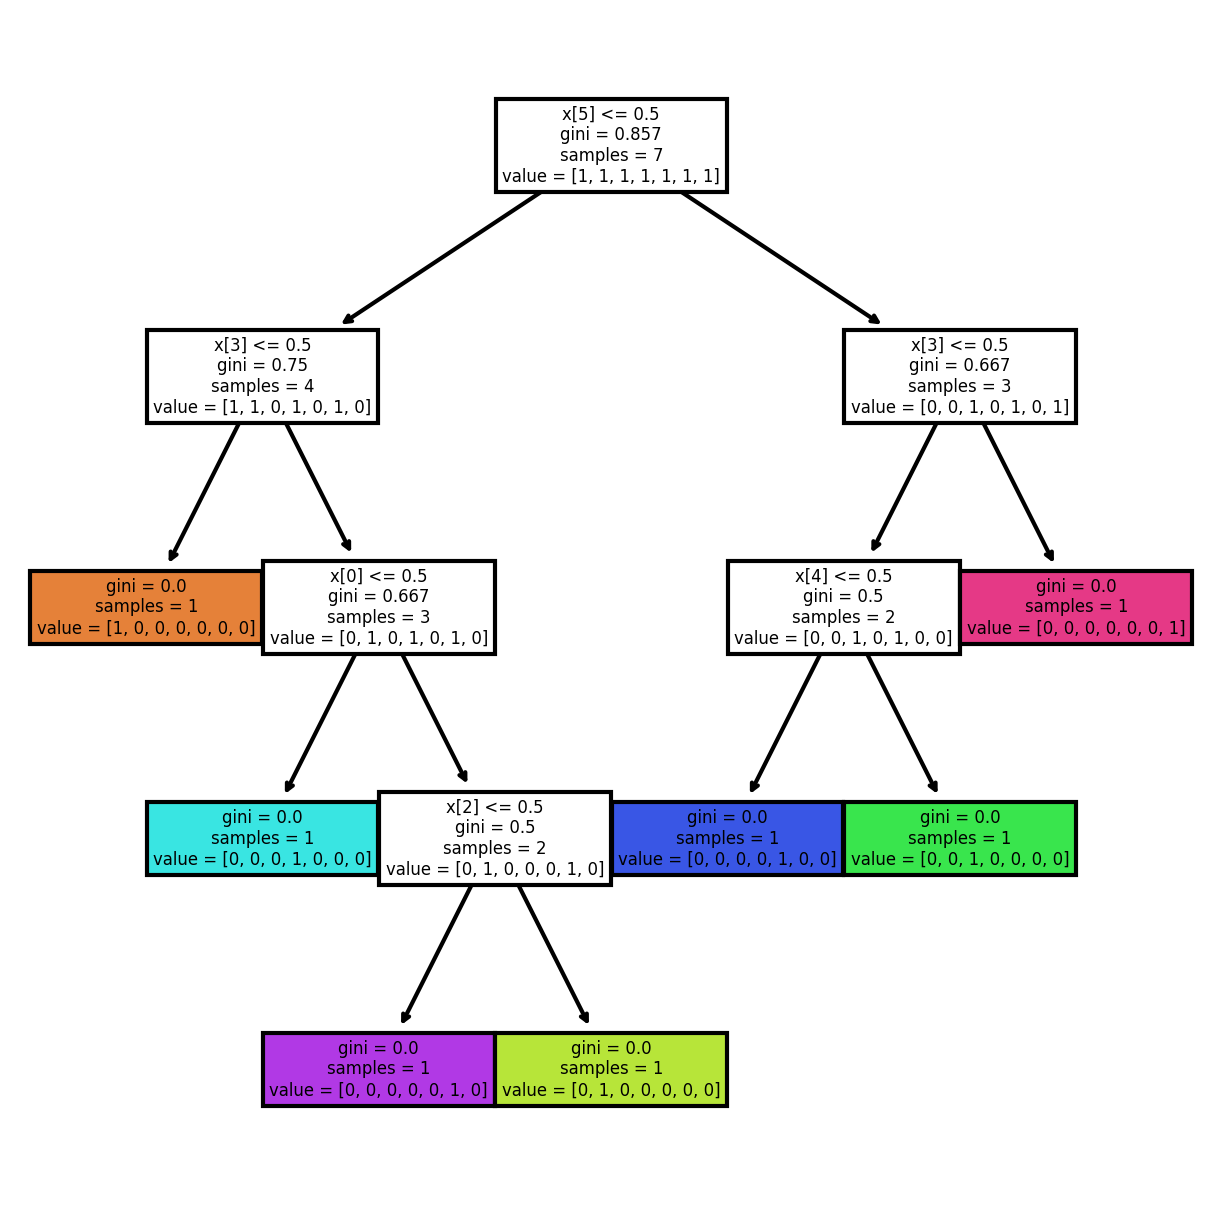

In [ ]:
plt.figure(figsize = (5,5), dpi = 300)
tree.plot_tree(arbol, filled = True)
plt.show()

Como puedes observar, el arbol se separa utilizando indices de Gini, y cada una de las hojas es un resultado. Probemos tratando de encontrar un sospechoso con las caracteristicas que le demos:

In [ ]:
#Probemos con:
#Tiene cabello largo (1)
#No usa lentes (0)
#No usa sombrero (0)
#No es mujer (0)
#Tiene bigote (1)
#Tiene ojos claros (1)
caracteristicas = np.array([[1,0,0,0,1,1]], dtype=np.int16)
print("Nuestro sospechosos es: ")
print(arbol.predict(caracteristicas))

Nuestro sospechosos es: 
['Jose']


# Ejemplo 03

**Dr. Antonio Arista Jalife**

En este ejemplo veremos como funciona un Random Forest. Un Random Forest es una colección de árboles de decisión, que han sido entrenados independientemente. Para comenzar con el ejemplo, importemos unas librerías extra de Scikit-learn

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier as forest

Utilizaremos los mismos datos de entrada y salida de los otros ejemplos: Las personas del adivina quien y sus características. Si bien es cierto estamos usando el ejemplo del "Adivina Quien", puedes utilizar prácticamente cualquier cantidad de datos para predecir cualquier salida posible.

In [ ]:
#Para las salidas, utilizaremos la variable Y
y2 = ["Antonio", "Elly", "Patricia", "Maria", "Juana", "Jose", "Luis"]

#Caracteristicas
#Cabello largo | Usa lentes | Usa sombrero | Es mujer | Tiene bigote | Tiene ojos claros
x2 = np.array([
     [0,1,0,0,0,0], #Antonio: No tiene cabello largo, usa lentes, no usa sombrero, no es mujer, no tiene bigote, no tiene ojos claros
     [1,1,1,1,0,0], #Elly: Tiene cabello largo, usa lentes, usa sombrero, es mujer, no tiene bigote, no tiene ojos claros
     [0,0,1,1,0,1], #Patricia: ...
     [1,1,0,1,0,0], #Maria: ...
     [0,0,1,1,0,0], #Juana: ...
     [1,0,0,0,1,1], #José: ...
     [0,1,1,0,0,1]  #Luis: ...
    ], dtype=np.int16)

Primero vamos a generar un árbol de decisión simple y trataremos de que el árbol de decisión por si solo haga el trabajo. Estoy dejando un random seed de 12, pero puedes cambiarlo a None para obtener resultados diferentes cada vez,

In [ ]:
random_seed = 12

arbol1 = tree.DecisionTreeClassifier(random_state=random_seed)
arbol1 = arbol.fit(x2,y2)

Ahora, veamos que tal funciona nuestro solitario árbol de decisiones con José, pero con diferentes características como lentes, sombrero, o lentes y sombrero

In [ ]:
#Este sospechoso es José: es exactamente igual a los datos del adivina quién
caracteristicas = np.array([[1,0,0,0,1,1]], dtype=np.int16)
print("Nuestro sospechoso original es")
print(arbol1.predict(caracteristicas))

#este sospechoso es José pero con lentes
caracteristicas = np.array([[1,1,0,0,1,1]], dtype=np.int16)
print("Nuestro sospechoso con lentes es")
print(arbol1.predict(caracteristicas))

#Este sospechoso es José pero con sombrero
caracteristicas = np.array([[1,0,1,0,1,1]], dtype=np.int16)
print("Nuestro sospechoso con sombrero es")
print(arbol1.predict(caracteristicas))

#Este sospechoso es José pero con lentes y sombrero
caracteristicas = np.array([[1,1,1,0,1,1]], dtype=np.int16)
print("Nuestro sospechoso con lentes y sombrero es")
print(arbol1.predict(caracteristicas))


Nuestro sospechoso original es
['Jose']
Nuestro sospechoso con lentes es
['Maria']
Nuestro sospechoso con sombrero es
['Patricia']
Nuestro sospechoso con lentes y sombrero es
['Elly']


Como puedes ver, el árbol de decisiones falla terriblemente en este caso, y es normal, el árbol de decisión no es muy resistente a variaciones. Pero que pasa si creamos un bosque completo de 800 árboles?

In [ ]:
bosque = forest(n_estimators=800, random_state=random_seed)
bosque.fit(x,y)

RandomForestClassifier(n_estimators=800, random_state=12)

Ya tenemos un bosque entero, vamos a ver que tal se comporta!

In [ ]:
#Este sospechoso es José: es exactamente igual a los datos del adivina quién
caracteristicas = np.array([[1,0,0,0,1,1]], dtype=np.int16)
print("Nuestro sospechoso original es")
print(bosque.predict(caracteristicas))

#este sospechoso es José pero con lentes
caracteristicas = np.array([[1,1,0,0,1,1]], dtype=np.int16)
print("Nuestro sospechoso con lentes es")
print(bosque.predict(caracteristicas))

#Este sospechoso es José pero con sombrero
caracteristicas = np.array([[1,0,1,0,1,1]], dtype=np.int16)
print("Nuestro sospechoso con sombrero es")
print(bosque.predict(caracteristicas))

#Este sospechoso es José pero con lentes y sombrero
caracteristicas = np.array([[1,1,1,0,1,1]], dtype=np.int16)
print("Nuestro sospechoso con lentes y sombrero es")
print(bosque.predict(caracteristicas))

Nuestro sospechoso original es
['José']
Nuestro sospechoso con lentes es
['José']
Nuestro sospechoso con sombrero es
['José']
Nuestro sospechoso con lentes y sombrero es
['Luis']


Como podemos ver, 800 árboles votando son mucho mas fiables que solamente 1 haciendo todo el trabajo. Resiste mucho mejor las variaciones. Puedes revisar cualquiera de los 800 árboles en la siguiente celda. Varía el "numeroArbol" vara ver distintos árboles y como toman la decisión.

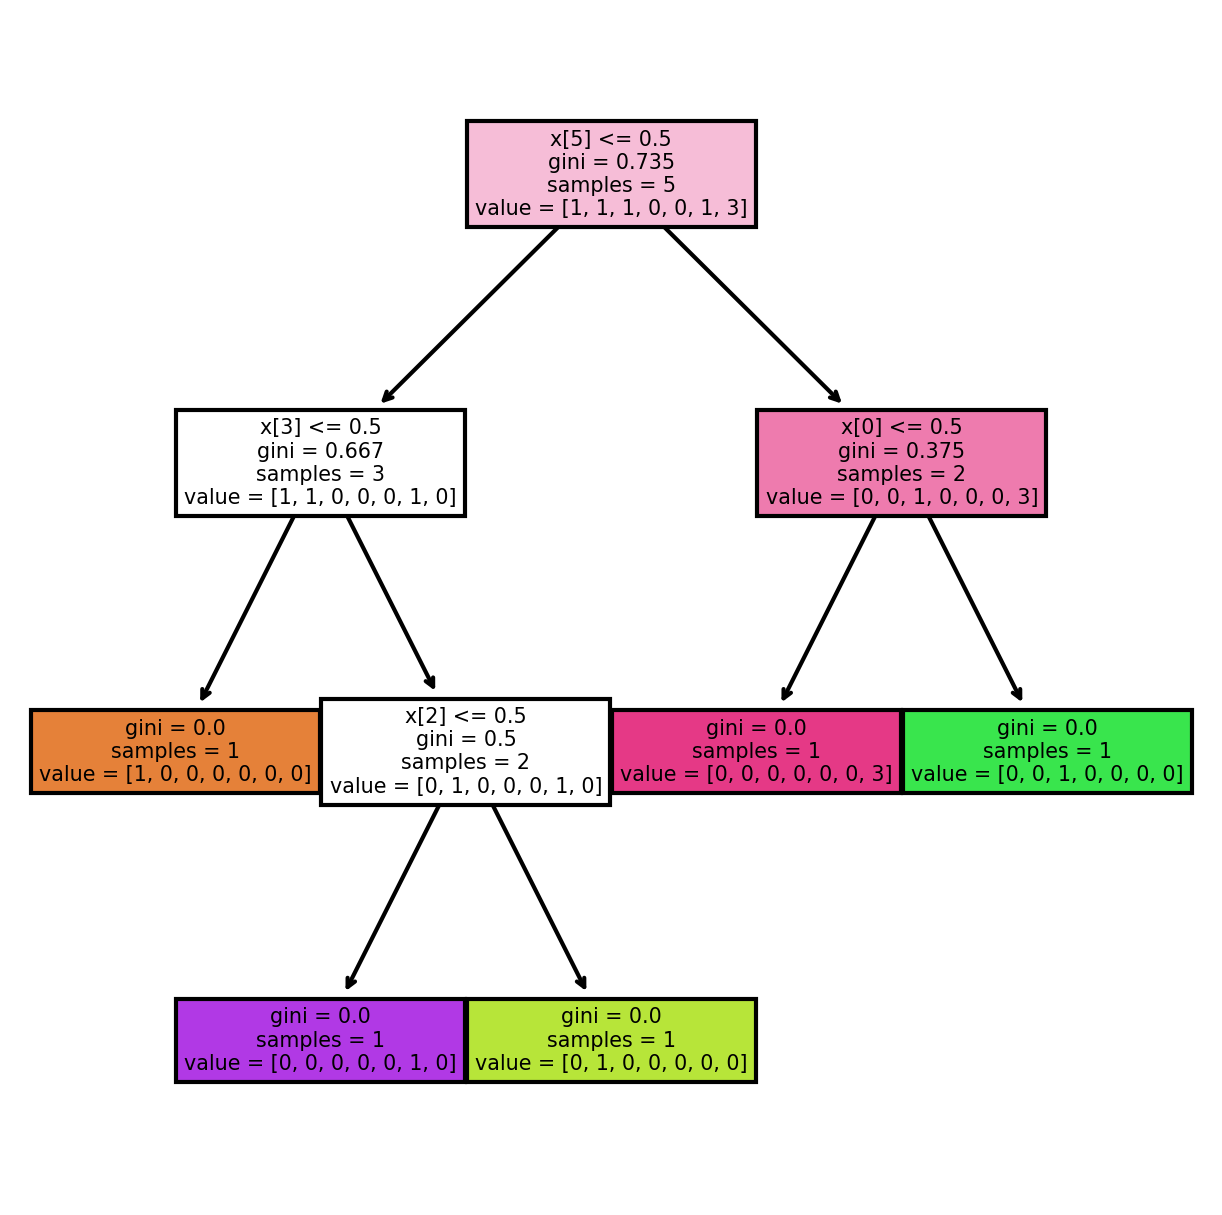

In [ ]:
#Sientete libre de elegir alguno de los arboles:
numeroArbol = 18
arbolDelBosque = bosque.estimators_[numeroArbol]

plt.figure(figsize = (5,5), dpi=300)
tree.plot_tree(arbolDelBosque, filled=True)
plt.show()